# **Machine Learnin Assignment - 02**
Name: Soikat Das

Enrollment No: 24565022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.stats.diagnostic import linear_rainbow

**Load and prepare the data**

In [ ]:
df = pd.read_csv('tips.csv')

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


# **1. Data Exploration and Visualization**

**Create scatter plot**

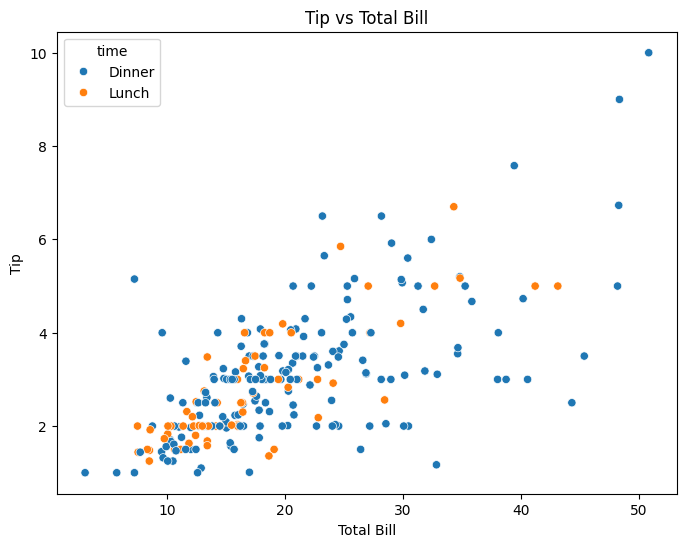

In [ ]:
# Scatter Plot: Tip vs Total Bill
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time')
plt.title('Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

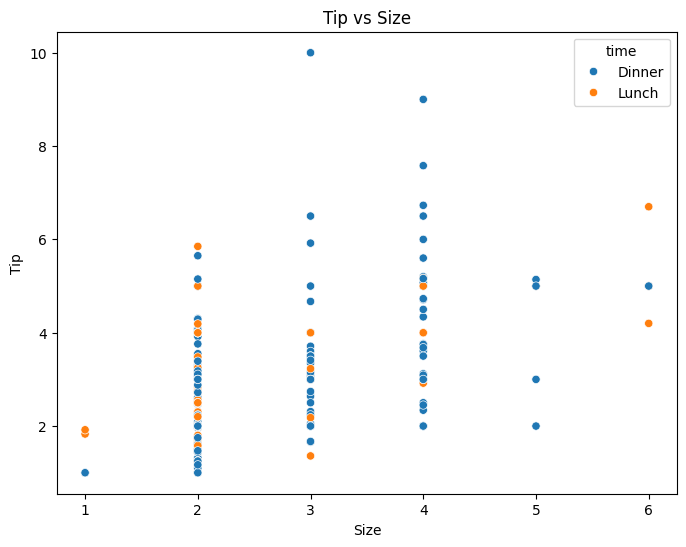

In [ ]:
# Scatter Plot: Tip vs Size
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='size', y='tip', hue='time')
plt.title('Tip vs Size')
plt.xlabel('Size')
plt.ylabel('Tip')
plt.show()

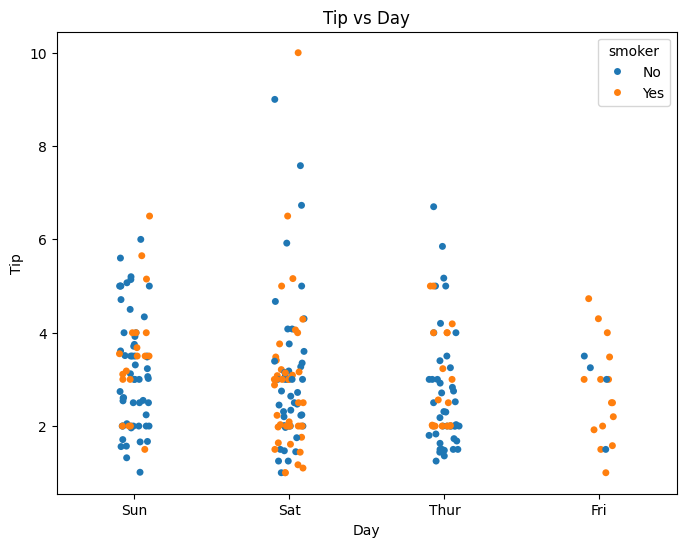

In [ ]:
# Scatter Plot: Tip vs Day
plt.figure(figsize=(8, 6))
sns.stripplot(data=df, x='day', y='tip', jitter=True, hue='smoker')
plt.title('Tip vs Day')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

**Box Plot**

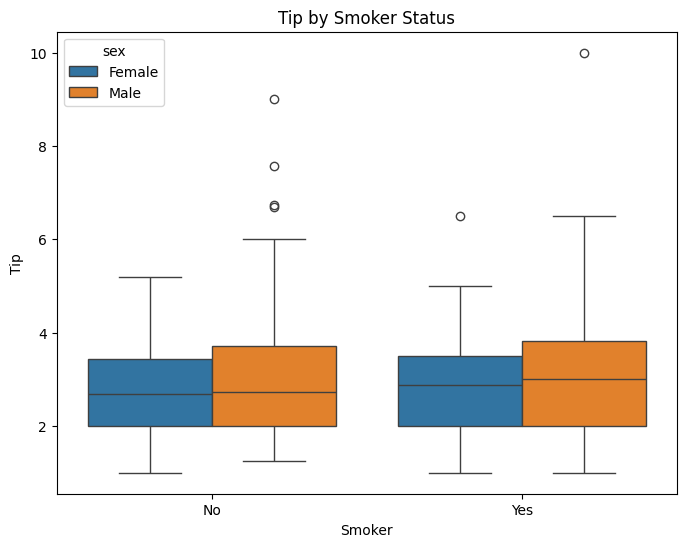

In [ ]:
# Box Plot: Tip by Smoker Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='tip', hue='sex')
plt.title('Tip by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Tip')
plt.show()

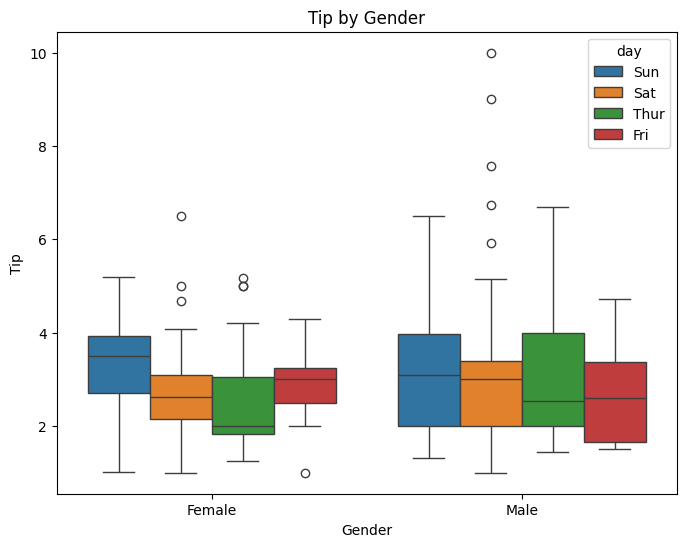

In [ ]:
# Box Plot: Tip by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='tip', hue='day')
plt.title('Tip by Gender')
plt.xlabel('Gender')
plt.ylabel('Tip')
plt.show()

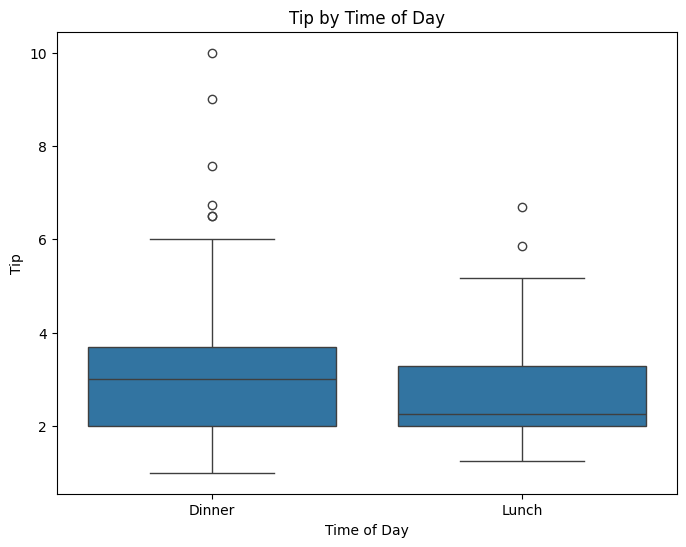

In [ ]:
# Box Plot: Tip by Time of Day
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='time', y='tip')
plt.title('Tip by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Tip')
plt.show()

**Correlation Matrix Heatmap**

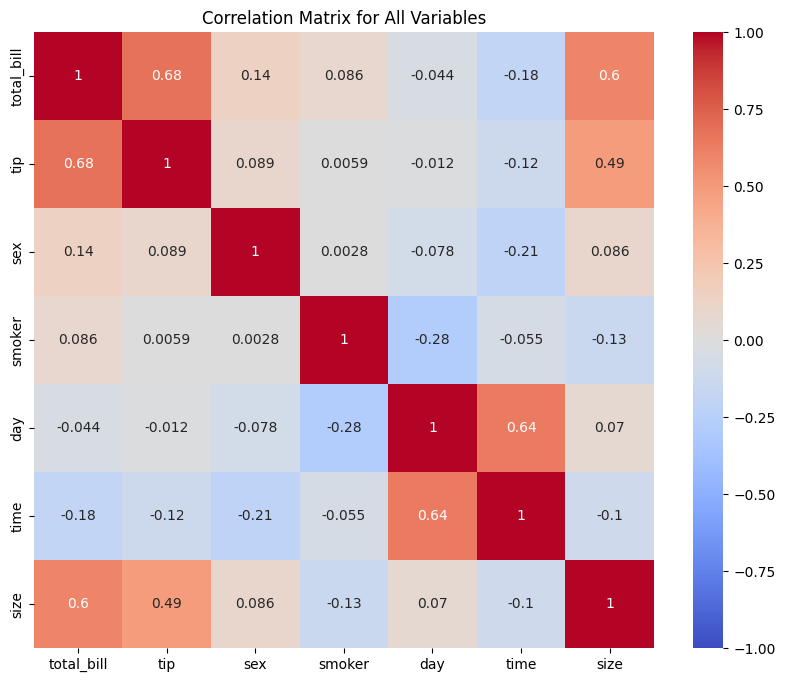

In [ ]:
df_encoded = df.copy()
categorical_cols = ['sex', 'smoker', 'day', 'time']
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

plt.figure(figsize=(10, 8))
correlation = df_encoded.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for All Variables')
plt.show()

**Pair plots for multiple features**

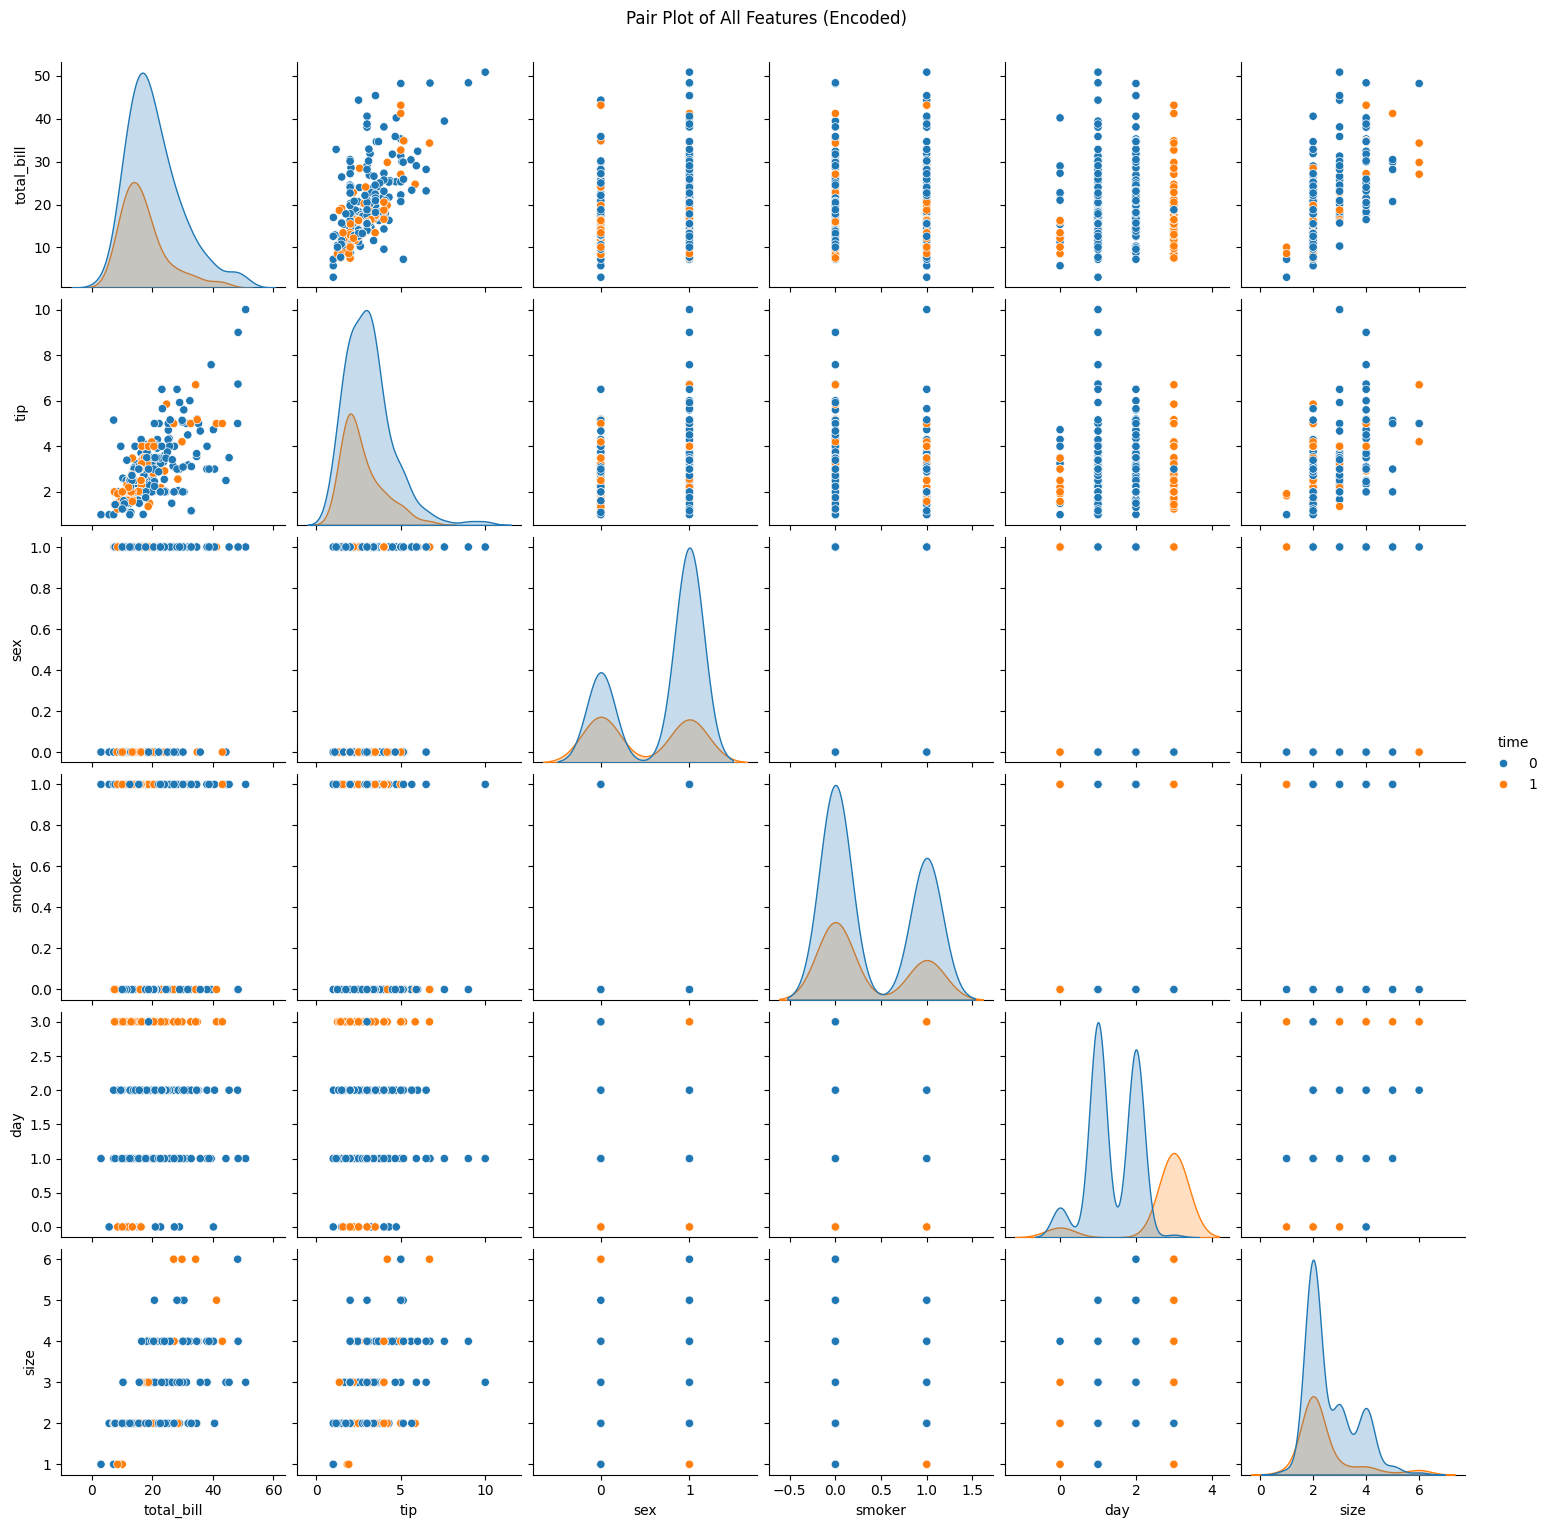

In [ ]:
sns.pairplot(df_encoded, hue='time')
plt.suptitle('Pair Plot of All Features (Encoded)', y=1.02)
plt.show()

# **2. Data Preprocessing**

**Encoding categorical variables**

In [ ]:
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

**Feature scaling**

In [ ]:
X = df_encoded[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
y = df_encoded['tip']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**Train-test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Scale the features**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **3. Linearity Analysis**

**Rainbow test for linearity**

In [ ]:
def rainbow_test(X, y):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    rainbow_statistic, rainbow_p_value = linear_rainbow(model)
    return rainbow_statistic, rainbow_p_value

In [ ]:
rainbow_stat, rainbow_p = rainbow_test(X_train_scaled, y_train)
print(f"Rainbow Test - Statistic: {rainbow_stat:.4f}, p-value: {rainbow_p:.4f}")

Rainbow Test - Statistic: 1.5941, p-value: 0.0128


**Linearity Check using Pearson correlation, Spearman correlation, Linear regression R-squared.**

In [ ]:
def check_linearity(X, y):
    """
    Check linearity using multiple methods:
    1. Pearson correlation
    2. Spearman correlation
    3. Linear regression R-squared
    """
    results = {}

    # Pearson correlation
    pearson_corr = []
    for i in range(X.shape[1]):
        corr, p_value = stats.pearsonr(X[:, i], y)
        pearson_corr.append((corr, p_value))

    # Spearman correlation
    spearman_corr = []
    for i in range(X.shape[1]):
        corr, p_value = stats.spearmanr(X[:, i], y)
        spearman_corr.append((corr, p_value))

    # Linear regression R-squared
    lr = LinearRegression()
    lr.fit(X, y)
    r2 = r2_score(y, lr.predict(X))

    results['pearson'] = pearson_corr
    results['spearman'] = spearman_corr
    results['r2'] = r2

    return results



In [ ]:
linearity_results = check_linearity(X_train_scaled, y_train)
print("\nLinearity Test Results:")
print("Feature-wise Pearson correlations:")
for i, (corr, p_val) in enumerate(linearity_results['pearson']):
    print(f"{X.columns[i]}: correlation = {corr:.4f}, p-value = {p_val:.4f}")

print("\nFeature-wise Spearman correlations:")
for i, (corr, p_val) in enumerate(linearity_results['spearman']):
    print(f"{X.columns[i]}: correlation = {corr:.4f}, p-value = {p_val:.4f}")

print(f"\nOverall Linear Regression R-squared: {linearity_results['r2']:.4f}")


Linearity Test Results:
Feature-wise Pearson correlations:
total_bill: correlation = 0.6565, p-value = 0.0000
size: correlation = 0.4900, p-value = 0.0000
sex: correlation = 0.1022, p-value = 0.1550
smoker: correlation = -0.0204, p-value = 0.7774
day: correlation = -0.0116, p-value = 0.8726
time: correlation = -0.1402, p-value = 0.0506

Feature-wise Spearman correlations:
total_bill: correlation = 0.6573, p-value = 0.0000
size: correlation = 0.4799, p-value = 0.0000
sex: correlation = 0.0640, p-value = 0.3744
smoker: correlation = -0.0079, p-value = 0.9130
day: correlation = 0.0041, p-value = 0.9548
time: correlation = -0.1640, p-value = 0.0220

Overall Linear Regression R-squared: 0.4559


# **4. Model Training and Evaluation**

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')

    print(f"\n{model_name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"Cross-validation R2 Scores: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return y_pred, r2

**models**

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

**Train and evaluate all models**

In [ ]:
results = {}
for name, model in models.items():
    y_pred, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
    results[name] = {'r2': r2, 'predictions': y_pred}


Linear Regression Results:
RMSE: 0.8336
R2 Score: 0.4441
Cross-validation R2 Scores: 0.3192 (+/- 0.5515)

Ridge Regression Results:
RMSE: 0.8329
R2 Score: 0.4449
Cross-validation R2 Scores: 0.3201 (+/- 0.5483)

Lasso Regression Results:
RMSE: 1.2036
R2 Score: -0.1590
Cross-validation R2 Scores: -0.0095 (+/- 0.0551)

Decision Tree Results:
RMSE: 1.1889
R2 Score: -0.1308
Cross-validation R2 Scores: -0.2681 (+/- 1.4622)

Random Forest Results:
RMSE: 0.9864
R2 Score: 0.2216
Cross-validation R2 Scores: 0.3524 (+/- 0.4718)

SVR Results:
RMSE: 0.8471
R2 Score: 0.4259
Cross-validation R2 Scores: 0.3363 (+/- 0.3574)

KNN Results:
RMSE: 0.8997
R2 Score: 0.3524
Cross-validation R2 Scores: 0.2678 (+/- 0.4932)


# **5. Feature Importance Analysis (using Random Forest)**

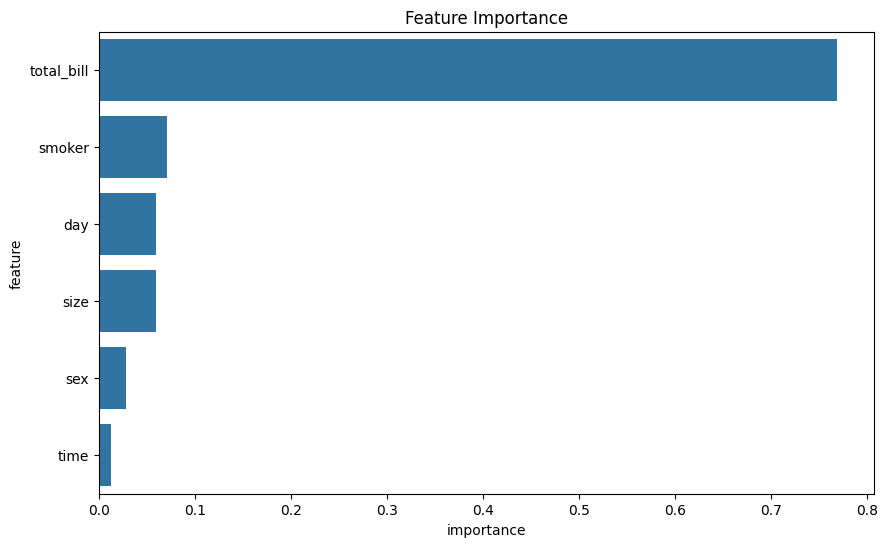

In [ ]:
rf_model = models['Random Forest']
rf_model.fit(X_train_scaled, y_train)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# **6. Residual Analysis for the best performing model**

Best Model Name: Ridge Regression


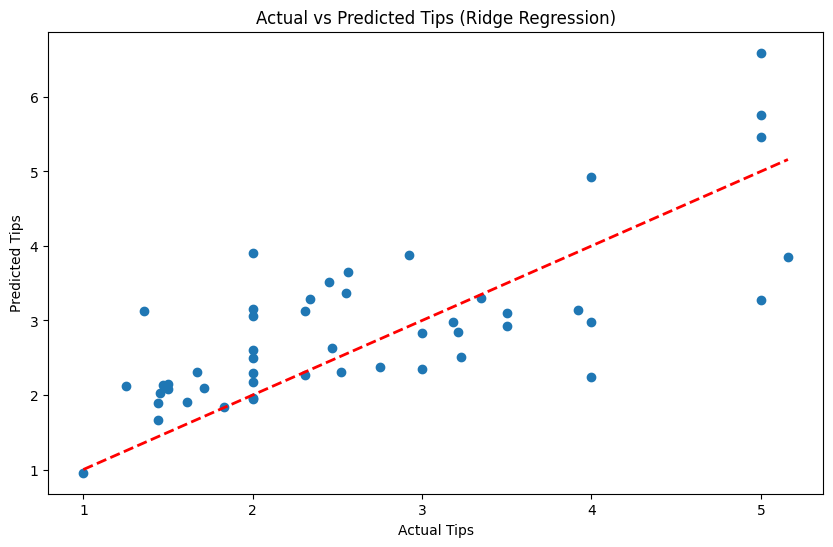

In [ ]:
best_model_name = max(results.items(), key=lambda x: x[1]['r2'])[0]
best_predictions = results[best_model_name]['predictions']
print("Best Model Name:", best_model_name)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.title(f'Actual vs Predicted Tips ({best_model_name})')
plt.show()

**Plot residuals**

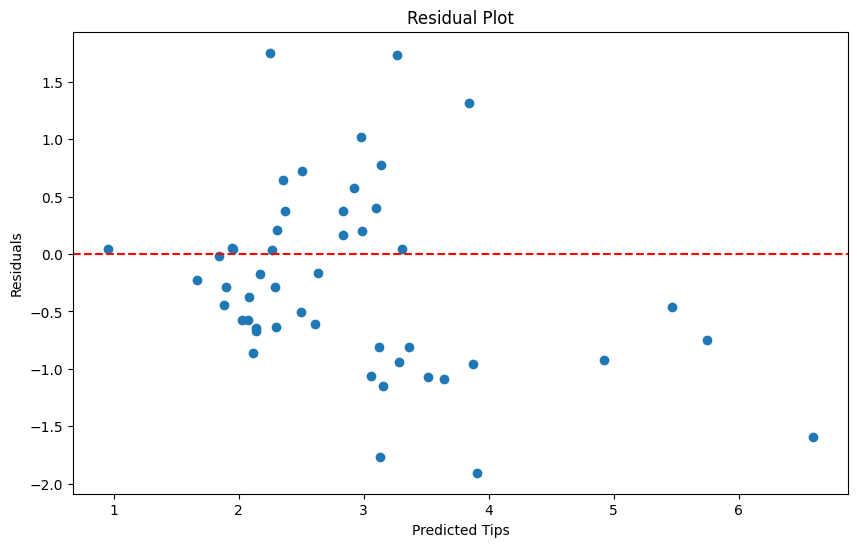

In [ ]:
residuals = y_test - best_predictions
plt.figure(figsize=(10, 6))
plt.scatter(best_predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Tips')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Line Plot**

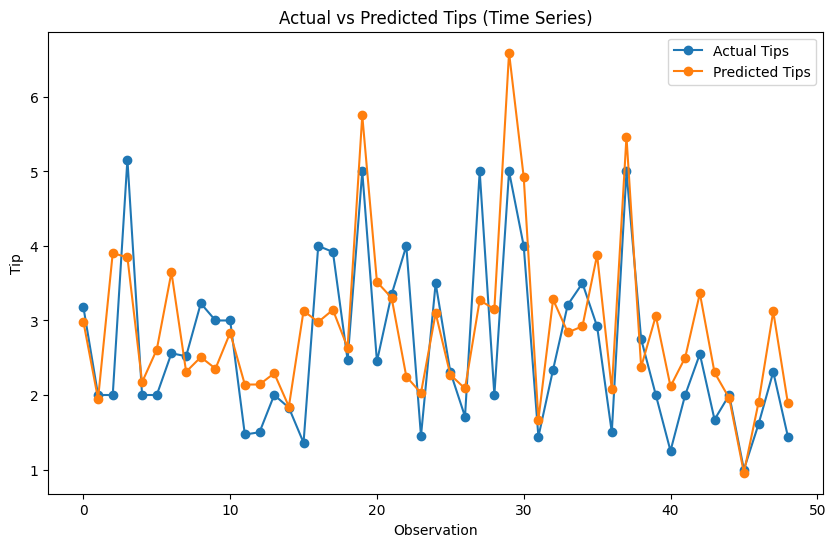

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Tips', marker='o')
plt.plot(range(len(y_test)), best_predictions, label='Predicted Tips', marker='o')
plt.xlabel('Observation')
plt.ylabel('Tip')
plt.title('Actual vs Predicted Tips (Time Series)')
plt.legend()
plt.show()

# **7. summary findings**

In [ ]:
print("\nKey Findings:")
print("1. Linearity Assessment:")
if rainbow_p < 0.05:
    print("- Data shows significant non-linear relationships (Rainbow test)")
else:
    print("- Data shows linear relationships (Rainbow test)")

print("\n2. Most Important Factors Affecting Tips:")
for _, row in feature_importance.head(3).iterrows():
    print(f"- {row['feature']}: {row['importance']:.4f}")

print(f"\n3. Best Performing Model: {best_model_name}")
print(f"   R2 Score: {results[best_model_name]['r2']:.4f}")


Key Findings:
1. Linearity Assessment:
- Data shows significant non-linear relationships (Rainbow test)

2. Most Important Factors Affecting Tips:
- total_bill: 0.7689
- smoker: 0.0707
- day: 0.0598

3. Best Performing Model: Ridge Regression
   R2 Score: 0.4449
